The following will be a group-based activity which you will do in class.

The data in the file https://raw.githubusercontent.com/ajstewartlang/02_intro_to_python_programming/main/data/ANOVA_class_work.csv are from an experiment with 96 participants. We measured how quickly (in milliseconds) people could pronounce a word that was presented to them. Words were presented either normally (Condition A) or were visually degraded (Condition B). This was a between participants factor of visual quality with 2 levels. Visualise the data and report the key descriptives before then running the appropriate ANOVA.

Can you turn your code into a function called my_anova() so that you can call it with the command my_anova('https://raw.githubusercontent.com/ajstewartlang/02_intro_to_python_programming/main/data/ANOVA_class_work.csv') and will produce the output of your ANOVA? Hint: you need to pass just the location of your data file to your function, and can keep the code you’ve written above virtually unchanged.

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
my_data = pd.read_csv('https://raw.githubusercontent.com/ajstewartlang/02_intro_to_python_programming/main/data/ANOVA_class_work.csv')

In [3]:
my_data.head()

,participant,condition,response_time
0,1,condition_a,984
1,2,condition_a,1005
2,3,condition_a,979
3,4,condition_a,1040
4,5,condition_a,1008


In [4]:
grouped_data = my_data.groupby(['condition'])
grouped_data.describe()['response_time']

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
condition_a,48.0,1002.229167,21.045280,945.0,990.00,1003.5,1017.25,1040.0
condition_b,48.0,1020.354167,23.524084,970.0,1003.25,1021.0,1032.25,1075.0


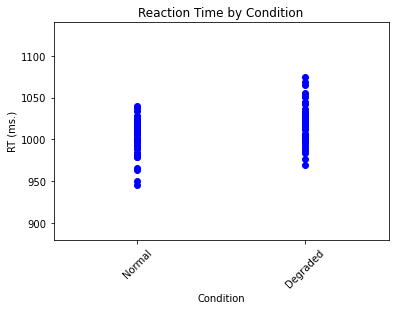

In [5]:
plt.plot(my_data['condition'], my_data['response_time'], 'bo')
plt.xlabel('Condition')
plt.ylabel('RT (ms.)')
plt.title('Reaction Time by Condition')
plt.xticks([0, 1], ['Normal', 'Degraded'], rotation=45)
plt.margins(.5, .5)
plt.show()

How might you re-plot the above as a jittered or beeswarm plot?

In [6]:
import seaborn as sns

Text(0.5, 1.0, 'Reaction Time (ms.) by Condition')

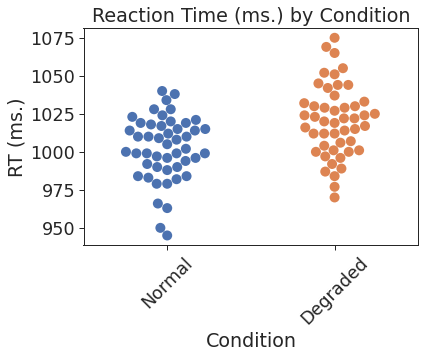

In [9]:
sns.set_theme(style='ticks', context='paper', font_scale=2)
sns.swarmplot(x='condition', y='response_time', data=my_data,size=10)
plt.xticks([0, 1], ['Normal', 'Degraded'], rotation=45)
plt.xlabel("Condition")
plt.ylabel("RT (ms.)")
plt.title("Reaction Time (ms.) by Condition")

If you're interested in finding out more about the seaborn library, you can read the paper introducing it [here](https://www.theoj.org/joss-papers/joss.03021/10.21105.joss.03021.pdf) and view the website which includes lots of examples and tutorials [here](https://seaborn.pydata.org/). 

In [ ]:
my_std = grouped_data['response_time'].std()
my_means = grouped_data['response_time'].mean()
error = [my_std[0], my_std[1]]

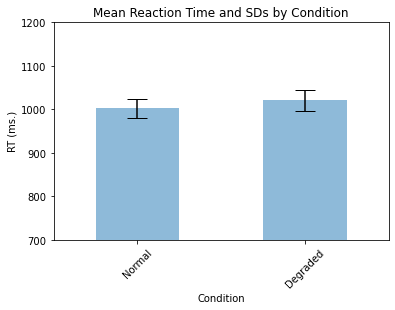

In [15]:
my_means.plot.bar(yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylabel('RT (ms.)')
plt.xlabel('Condition')
plt.xticks([0, 1], ['Normal', 'Degraded'], rotation=45)
plt.title('Mean Reaction Time and SDs by Condition')
plt.ylim((700, 1200))
plt.show()

In [6]:
normal = my_data[my_data['condition']=='condition_a']['response_time']
degraded = my_data[my_data['condition']=='condition_b']['response_time']

In [7]:
stats.f_oneway(normal, degraded)

F_onewayResult(statistic=15.82752793841669, pvalue=0.00013639071462771327)

In [8]:
import pandas as pd
from scipy import stats

def my_anova(x):
    my_data = pd.read_csv(x)
    
    normal = my_data[my_data['condition']=='condition_a']['response_time']
    degraded = my_data[my_data['condition']=='condition_b']['response_time']
    
    return stats.f_oneway(normal, degraded)

In [9]:
my_anova('https://raw.githubusercontent.com/ajstewartlang/02_intro_to_python_programming/main/data/ANOVA_class_work.csv')

F_onewayResult(statistic=15.82752793841669, pvalue=0.00013639071462771327)

Our data file is called ANOVA_data2.csv and can be found here:

https://raw.githubusercontent.com/ajstewartlang/11_glm_anova_pt1/master/data/ANOVA_data2.csv

48 participants responded to a word that differed in how frequent it was. This factor is between participants and we have four levels coded as ‘very low’, ‘low’, ‘high’, and ‘very high’. Our DV is reaction time and is coded as ‘RT’. Subject number is coded as ‘Subject’. We want to know if there is a difference between our conditions (and if so, where that difference lies). Calculate descriptive statistices and conduct the appropriate ANOVA.

In [53]:
import pandas as pd
from scipy import stats

In [25]:
def read_my_data(x):
    return(pd.read_csv(x))

In [28]:
data = read_my_data("https://raw.githubusercontent.com/ajstewartlang/11_glm_anova_pt1/master/data/ANOVA_data2.csv")

In [36]:
very_low = data[data['Condition']=='very low']['RT']
low = data[data['Condition']=='low']['RT']
high = data[data['Condition']=='high']['RT']
very_high = data[data['Condition']=='very high']['RT']

In [50]:
grouped_data = data.groupby(['Condition'])

In [52]:
grouped_data.describe()['RT']

,count,mean,std,min,25%,50%,75%,max
Condition,,,,,,,,
high,12.0,927.083333,78.610037,786.0,860.75,971.0,986.25,1016.0
low,12.0,1164.666667,74.722923,1033.0,1122.25,1155.5,1216.00,1322.0
very high,12.0,612.666667,112.266188,373.0,556.00,618.5,687.50,769.0
very low,12.0,1478.166667,85.708633,1378.0,1398.75,1486.5,1520.50,1626.0


In [37]:
stats.f_oneway(very_low, low, high, very_high)

F_onewayResult(statistic=203.20843323788185, pvalue=8.614496435552629e-26)

In [39]:
stats.ttest_ind(very_low, low)

Ttest_indResult(statistic=9.55075176522744, pvalue=2.7673993199893625e-09)

In [40]:
stats.ttest_ind(very_low, high)

Ttest_indResult(statistic=16.41463060047988, pvalue=7.906416052595626e-14)

In [41]:
stats.ttest_ind(very_low, very_high)

Ttest_indResult(statistic=21.22706126922631, pvalue=3.824775020794922e-16)

In [42]:
stats.ttest_ind(low, high)

Ttest_indResult(statistic=7.5883362496075755, pvalue=1.4028612167283343e-07)

In [43]:
stats.ttest_ind(low, very_high)

Ttest_indResult(statistic=14.179033699480147, pvalue=1.5160619459027267e-12)

In [44]:
stats.ttest_ind(high, very_high)

Ttest_indResult(statistic=7.9471422710203425, pvalue=6.588839271013657e-08)